# 1. Import Libraries and Resources

In [1]:
import numpy as np 
import math 
import pandas as pd 

Import text on a dataframe with pandas

In [2]:
en = pd.read_csv('/content/derechos-ingles.txt', header = None, delimiter = "\t", names=["text"])
en = en.dropna()
en['text'] = en['text'].astype(str) 
en = ' '.join(en["text"])
en

'Preamble Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, justice and peace in the world, Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind, and the advent of a world in which human beings shall enjoy freedom of speech and belief and freedom from fear and want has been proclaimed as the highest aspiration of the common people, Whereas it is essential, if man is not to be compelled to have recourse, as a last resort, to rebellion against tyranny and oppression, that human rights should be protected by the rule of law, Whereas it is essential to promote the development of friendly relations between nations, Whereas the peoples of the United Nations have in the Charter reaffirmed their faith in fundamental human rights, in the dignity and worth of the human person and in the equal rights of men and women and have d

Counting words for future analysis 

In [3]:
WordsEN = en.split(' ')
len(WordsEN)

1774

Just a simple for for checking the frecuency of each word

In [4]:
uniqueWords = set(WordsEN)

numOfWordsEN = dict.fromkeys(uniqueWords, 0)
for word in WordsEN:
    numOfWordsEN[word] += 1

print(numOfWordsEN)

{'': 1, '9.': 1, 'origin,': 1, 'dissolution.': 1, 'peace.': 1, 'community,': 1, 'scientific': 1, 'Furthermore,': 1, 'distinction': 2, 'has': 28, 'guarantees': 1, 'Everyone,': 2, 'Education': 2, 'manifest': 1, 'trade': 2, 'society.': 1, '25.': 1, 'degrading': 1, 'home': 1, 'dignity,': 1, 'from': 5, 'leave': 1, 'until': 1, 'applicable': 1, 'inherent': 1, 'did': 1, 'directly': 1, 'Member': 2, 'marriage': 1, 'that': 4, 'among': 3, 'religious': 1, 'unit': 1, 'community': 2, '23.': 1, 'assistance.': 1, 'proved': 1, 'tribunal,': 1, 'of': 89, 'These': 1, 'cultural': 2, 'Nor': 1, 'rule': 1, 'children.': 1, 'beings': 2, '17.': 1, 'maintenance': 1, 'ensuring': 1, 'international,': 1, 'hold': 1, 'racial': 1, 'Therefore': 1, 'upon': 1, 'UNIVERSAL': 1, 'equal': 11, 'invoked': 1, 'choose': 1, 'Charter': 1, 'living': 1, 'every': 2, 'form': 1, 'language,': 1, 'prohibited': 1, 'strengthening': 1, 'without': 5, 'conscience': 3, 'interpreted': 1, 'practice,': 1, 'stages.': 1, 'freely': 2, 'measures,': 1, 

**NOTE:**

I've a lot of garbage, i need to clean it , but is this information garbage ? 🤔

For example:

**'(3)': 5,**

# 2. IDF Analysis

Import NLTK library for a corpus 

**NOTE:**
I need to say that i didn't split the original text on bags of 10 words, I prefer to use a corpus to compare words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

**General mathematician expression**

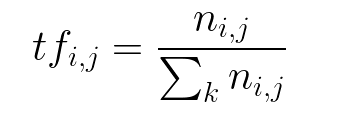

In [6]:
def computeTF(wordDict, arrayWords):
    tfDict = {}
    arrayWordsCount = len(arrayWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(arrayWordsCount)
    return tfDict

Using previous function to get TF of each word

In [11]:
tfEN = computeTF(numOfWordsEN, WordsEN)
print(tfEN)

{'': 0.0005636978579481398, '9.': 0.0005636978579481398, 'origin,': 0.0005636978579481398, 'dissolution.': 0.0005636978579481398, 'peace.': 0.0005636978579481398, 'community,': 0.0005636978579481398, 'scientific': 0.0005636978579481398, 'Furthermore,': 0.0005636978579481398, 'distinction': 0.0011273957158962795, 'has': 0.015783540022547914, 'guarantees': 0.0005636978579481398, 'Everyone,': 0.0011273957158962795, 'Education': 0.0011273957158962795, 'manifest': 0.0005636978579481398, 'trade': 0.0011273957158962795, 'society.': 0.0005636978579481398, '25.': 0.0005636978579481398, 'degrading': 0.0005636978579481398, 'home': 0.0005636978579481398, 'dignity,': 0.0005636978579481398, 'from': 0.002818489289740699, 'leave': 0.0005636978579481398, 'until': 0.0005636978579481398, 'applicable': 0.0005636978579481398, 'inherent': 0.0005636978579481398, 'did': 0.0005636978579481398, 'directly': 0.0005636978579481398, 'Member': 0.0011273957158962795, 'marriage': 0.0005636978579481398, 'that': 0.00225

# 3. IDF Analysis

**General mathematician expression**

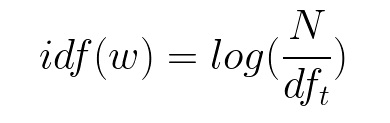

In [13]:
def computeIDF(corpus):
    import math
    N = len(corpus)
    
    idfDict = dict.fromkeys(corpus[0].keys(), 0)
    for document in corpus:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

Using previous function to get TF of each word


In [17]:
idfEN = computeIDF([numOfWordsEN]) 
print(idfEN)

{'': 0.0, '9.': 0.0, 'origin,': 0.0, 'dissolution.': 0.0, 'peace.': 0.0, 'community,': 0.0, 'scientific': 0.0, 'Furthermore,': 0.0, 'distinction': 0.0, 'has': 0.0, 'guarantees': 0.0, 'Everyone,': 0.0, 'Education': 0.0, 'manifest': 0.0, 'trade': 0.0, 'society.': 0.0, '25.': 0.0, 'degrading': 0.0, 'home': 0.0, 'dignity,': 0.0, 'from': 0.0, 'leave': 0.0, 'until': 0.0, 'applicable': 0.0, 'inherent': 0.0, 'did': 0.0, 'directly': 0.0, 'Member': 0.0, 'marriage': 0.0, 'that': 0.0, 'among': 0.0, 'religious': 0.0, 'unit': 0.0, 'community': 0.0, '23.': 0.0, 'assistance.': 0.0, 'proved': 0.0, 'tribunal,': 0.0, 'of': 0.0, 'These': 0.0, 'cultural': 0.0, 'Nor': 0.0, 'rule': 0.0, 'children.': 0.0, 'beings': 0.0, '17.': 0.0, 'maintenance': 0.0, 'ensuring': 0.0, 'international,': 0.0, 'hold': 0.0, 'racial': 0.0, 'Therefore': 0.0, 'upon': 0.0, 'UNIVERSAL': 0.0, 'equal': 0.0, 'invoked': 0.0, 'choose': 0.0, 'Charter': 0.0, 'living': 0.0, 'every': 0.0, 'form': 0.0, 'language,': 0.0, 'prohibited': 0.0, 'stre

# 4. TF-IDF Analysis

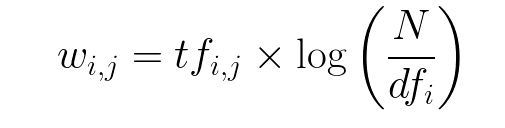


In [10]:
def computeTFIDF(tfarrayWords, idfs):
    tfidf = {}
    for word, val in tfarrayWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

Using previous function to get TF-IDF of each word

In [38]:
tfidfA = computeTFIDF(tfEN, idfs)
tfidfA = pd.DataFrame([tfidfA])
final =  tfidfA.transpose()
final

,0
,0.0
9.,0.0
"origin,",0.0
dissolution.,0.0
peace.,0.0
...,...
heavier,0.0
professional,0.0
time,0.0
world,0.0
